# Preprocessing
 This typically means converting all non-numeric columns to numeric, handling NaN values and generating new features from already existing features. 

In [21]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#local imports

sys.path.append(os.path.abspath(os.path.join('..')))
from src.data.manipulate import Manipulate


In [28]:
#read file
train_df = pd.read_csv('../data/clean/train.csv', dtype={'StateHoliday': object})
test_df = pd.read_csv('../data/clean/test.csv')
store_df = pd.read_csv('../data/clean/store.csv')

In [30]:
store_cols  = store_df.columns.tolist()
print(store_cols)
test_cols = test_df.columns.tolist()
print(test_cols)
train_cols = train_df.columns.tolist()
print(train_cols)

['Unnamed: 0', 'Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
['Unnamed: 0', 'Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Unnamed: 0', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [31]:
train_df = pd.merge(train_df, store_df, how= 'inner', on='Store')
test_df = pd.merge(test_df, store_df, how= 'inner', on='Store')

## Convert the tabular data to a time series data

In [32]:
#convert the tabular data to a time series data
ID = test_df['Id']
test_df.drop('Id', inplace=True, axis=1)
train_df.sort_values(['Store', 'Date'], ignore_index=True, inplace=True)
test_df.sort_values(['Store', 'Date'], ignore_index=True, inplace=True)

for dataset in (train_df, test_df):
    dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')
    dataset['Day'] = dataset.Date.dt.day
    dataset['Month'] = dataset.Date.dt.month
    dataset['Year'] = dataset.Date.dt.year
    dataset['DayOfYear'] = dataset.Date.dt.dayofyear
    dataset['WeekOfYear'] = dataset.Date.dt.weekofyear
    dataset.set_index('Date', inplace=True)

In [33]:
test_df.head()

,Unnamed: 0_x,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0_y,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,40232,1,6,1.0,0,0,1,0,c,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",1,8,2015,213,31
2015-08-02,39376,1,7,0.0,0,0,1,0,c,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2,8,2015,214,31
2015-08-03,38520,1,1,1.0,1,0,1,0,c,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",3,8,2015,215,32
2015-08-04,37664,1,2,1.0,1,0,1,0,c,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",4,8,2015,216,32
2015-08-05,36808,1,3,1.0,1,0,1,0,c,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",5,8,2015,217,32


In [34]:
train_df.tail()

,Unnamed: 0_x,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0_y,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-27,5574,1115,1,10712,608,1,1,0,1,1114,...,2015.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",27,7,2015,208,31
2015-07-28,4459,1115,2,8093,500,1,1,0,1,1114,...,2015.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",28,7,2015,209,31
2015-07-29,3344,1115,3,7661,473,1,1,0,1,1114,...,2015.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",29,7,2015,210,31
2015-07-30,2229,1115,4,8405,502,1,1,0,1,1114,...,2015.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",30,7,2015,211,31
2015-07-31,1114,1115,5,8680,538,1,1,0,1,1114,...,2015.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",31,7,2015,212,31


<AxesSubplot:xlabel='Date'>

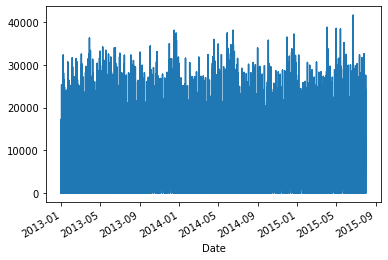

In [35]:
temp = train_df['Sales']
temp.plot()

In [36]:
manipulate = Manipulate(train_df)
# Fill missing numeric values
# manipulate.fill_columns_with_max(train_df.select_dtypes(exclude=['object']).columns.tolist())
# Fill non-numeric values (categorical values)
# manipulate.fill_columns_with_most_frequent(train_df.select_dtypes(include=['object']).columns.tolist())


In [37]:
manipulate.df.isna().any()

Unnamed: 0_x                 False
Store                        False
DayOfWeek                    False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
Unnamed: 0_y                 False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
Day                          False
Month                        False
Year                         False
DayOfYear                    False
WeekOfYear                   False
dtype: bool

### Extract the following from the datetime column

1. **Weekdays**

In [38]:
#set the weekday 1 for DayOfWeek b/n 1 and 5 and 0 for 6 and 7
day_of_week_index = train_df.columns.get_loc('DayOfWeek')
train_df.insert(day_of_week_index + 1, 'WeekDay', train_df['DayOfWeek'].apply(lambda x: 1 if x <= 5 else 0) )


2. **Weekends**

In [39]:
#set the weekend 1 for DayOfWeek equals 6 & 7 and 0 for the rest
day_of_week_index = train_df.columns.get_loc('DayOfWeek')
train_df.insert(day_of_week_index + 1, 'Weekend' ,train_df['DayOfWeek'].apply(lambda x : 0 if x <= 5 else 1))
train_df.head(100)

,Unnamed: 0_x,Store,DayOfWeek,Weekend,WeekDay,Sales,Customers,Open,Promo,StateHoliday,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1016095,1,2,0,1,0,0,0,0,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",1,1,2013,1,1
2013-01-02,1014980,1,3,0,1,5530,668,1,0,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2,1,2013,2,1
2013-01-03,1013865,1,4,0,1,4327,578,1,0,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",3,1,2013,3,1
2013-01-04,1012750,1,5,0,1,4486,619,1,0,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",4,1,2013,4,1
2013-01-05,1011635,1,6,1,0,4997,635,1,0,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",5,1,2013,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-06,910170,1,6,1,0,5075,657,1,0,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",6,4,2013,96,14
2013-04-07,909055,1,7,1,0,0,0,0,0,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",7,4,2013,97,14
2013-04-08,907940,1,1,0,1,6046,695,1,1,0,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",8,4,2013,98,15


3. **Number of days to holidays**

In [40]:
manipulate.add_number_of_days_to_holiday('StateHoliday')

Data Manipulatior:INFO->Successfully Added DaysToHoliday Column


4. **Number of days after holidays**

In [41]:
manipulate.add_number_of_days_after_holiday('StateHoliday')

Data Manipulatior:INFO->Successfully Added DaysAfterHoliday Column


5. **Beginning of month, mid month, and ending of month**

In [42]:
manipulate.add_month_timing('Day')

Data Manipulatior:INFO->Successfully Added MonthTiming Column


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0_x               1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Weekend                    1017209 non-null  int64  
 4   WeekDay                    1017209 non-null  int64  
 5   Sales                      1017209 non-null  int64  
 6   Customers                  1017209 non-null  int64  
 7   Open                       1017209 non-null  int64  
 8   Promo                      1017209 non-null  int64  
 9   StateHoliday               1017209 non-null  object 
 10  DaysAfterHoliday           1017209 non-null  int64  
 11  DaysToHoliday              1017209 non-null  int64  
 12  SchoolHoliday              1017209 non-null  int64  
 1

### Drop Unimportant columns 

In [44]:
train_df.drop(['Store','Customers'],axis=1,inplace=True)

In [45]:
train_df.to_csv('../data/processed/unlabeled_train_data.csv')

### Encode Categorical Columns

In [46]:
categorical_cols = train_df.select_dtypes(exclude=['number']).columns.tolist()
categorical_cols

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [47]:
# Label Object type data columns (StoreType,Assortment,StateHoliday,Season)

manipulate.label_columns(categorical_cols)


{'StateHoliday': LabelEncoder(),
 'StoreType': LabelEncoder(),
 'Assortment': LabelEncoder(),
 'PromoInterval': LabelEncoder()}

In [48]:
train_df['PromoInterval'].value_counts()

1    801153
0    118596
2     97460
Name: PromoInterval, dtype: int64

In [49]:
manipulate.label_columns(['PromoInterval'])

{'PromoInterval': LabelEncoder()}

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0_x               1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Weekend                    1017209 non-null  int64  
 3   WeekDay                    1017209 non-null  int64  
 4   Sales                      1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   DaysAfterHoliday           1017209 non-null  int64  
 9   DaysToHoliday              1017209 non-null  int64  
 10  SchoolHoliday              1017209 non-null  int64  
 11  Unnamed: 0_y               1017209 non-null  int64  
 12  StoreType                  1017209 non-null  int64  
 1

### Data Scaling

In [52]:
def get_min_max_of_dataframe_columns(df):
    top = df.max()
    top_df = pd.DataFrame(top, columns=['Max Value'])
    bottom = df.min()
    bottom_df = pd.DataFrame(bottom, columns=['Min Value'])
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

In [53]:
# Using StandardScaler to standardize the all columns
scale_list = train_df.columns.to_list()
# Scale
starndardized_train_df = manipulate.standardize_columns(scale_list)
get_min_max_of_dataframe_columns(train_df)

,Max Value,Min Value
Unnamed: 0_x,1.732049,-1.732049
DayOfWeek,1.502791,-1.501129
Weekend,1.585611,-0.630672
WeekDay,0.630672,-1.585611
Sales,9.292957,-1.499723
Open,0.452399,-2.210440
Promo,1.273237,-0.785400
StateHoliday,10.416984,-0.159217
DaysAfterHoliday,5.990086,-0.377145
DaysToHoliday,3.465814,-0.968911


In [54]:
starndardized_train_df.head()

,Unnamed: 0_x,DayOfWeek,Weekend,WeekDay,Sales,Open,Promo,StateHoliday,DaysAfterHoliday,DaysToHoliday,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,MonthTiming,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.728259,-1.000476,-0.630672,0.630672,-1.499723,-2.210440,-0.7854,3.366183,-0.377145,-0.968911,...,-1.001128,0.802373,0.810673,0.045131,-1.673123,-1.236292,-1.457193,-1.070616,-1.587114,-1.56689
2013-01-02,1.724462,-0.499823,-0.630672,0.630672,-0.063331,0.452399,-0.7854,-0.159217,-0.377145,1.133477,...,-1.001128,0.802373,0.810673,0.045131,-1.559327,-1.236292,-1.457193,-1.070616,-1.577273,-1.56689
2013-01-03,1.720665,0.000831,-0.630672,0.630672,-0.375805,0.452399,-0.7854,-0.159217,-0.023410,1.100627,...,-1.001128,0.802373,0.810673,0.045131,-1.445530,-1.236292,-1.457193,-1.070616,-1.567432,-1.56689
2013-01-04,1.716867,0.501484,-0.630672,0.630672,-0.334505,0.452399,-0.7854,-0.159217,0.330325,1.067778,...,-1.001128,0.802373,0.810673,0.045131,-1.331734,-1.236292,-1.457193,-1.070616,-1.557591,-1.56689
2013-01-05,1.713070,1.002138,1.585611,-1.585611,-0.201775,0.452399,-0.7854,-0.159217,0.684060,1.034928,...,-1.001128,0.802373,0.810673,0.045131,-1.217938,-1.236292,-1.457193,-1.070616,-1.547750,-1.56689


### Save Clean Data

In [55]:
train_df.to_csv('../data/processed/train.csv')